# k-MEANS CHALLENGE

**File:** kMeansChallenge.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# CHALLENGE

For this challenge, I invite you to to the following:

1. Import and prepare the `iris` dataset.
1. Conduct a k-means cluster analysis.
1. Visualize the clusters.

# IMPORT LIBRARIES

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

# LOAD DATA
Read the `iris` from "iris.csv" in the data folder and save in `df`.

In [4]:
# Reads the .csv file into variable df
df = pd.read_csv('data/iris.csv')

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
y = df.species

df = df.drop(columns='species')

df = pd.DataFrame(
    StandardScaler().fit_transform(df),
columns=df.columns)

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [7]:
# optimizamos con GridSeachCV (Silhouette Scores)
def s2(estimator, X): 
    return silhouette_score(X, estimator.predict(X))

param = range(2,6)

km = KMeans(random_state=0, init='k-means++')

grid = GridSearchCV(
    km,
    {'n_clusters' : param},
    scoring=s2,
    cv=2
)

grid.fit(df)

best_km = grid.best_estimator_

best_km.get_params()

c:\Users\daalvarado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\daalvarado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 975, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\daalvarado\AppData\Local\Temp\ipykernel_23300\549181438.py", line 3, in s2
    return silhouette_score(X, estimator.predict(X))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daalvarado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daalvarado\AppData\Local\Programs\Python\P

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Text(0, 0.5, 'Silhouette Score')

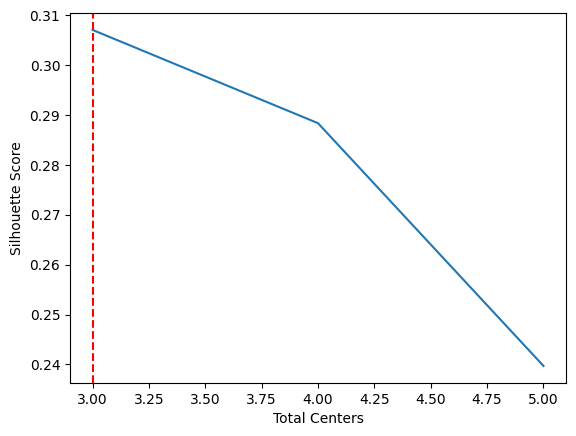

In [8]:
plt.plot(
    param,
    grid.cv_results_['mean_test_score']
)

plt.axvline(
    x=best_km.n_clusters,
    color='red',
    ls='--'
)

plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


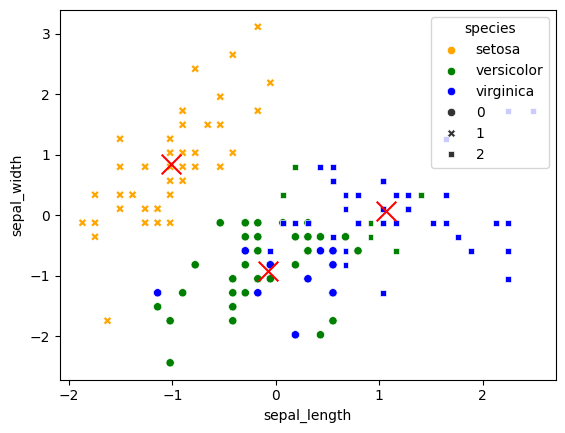

In [10]:
# vemos el mejor modelo
sns.scatterplot(
    x='sepal_length',
    y = 'sepal_width',
    data=df,
    hue=y,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue']
)

plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red'
)

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.